## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
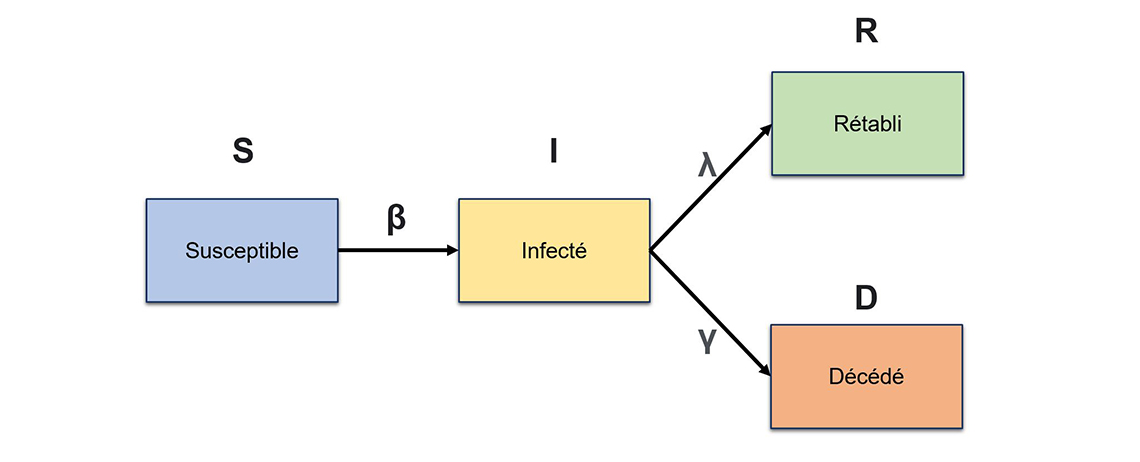


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

In [41]:
# Les variables du modele
# 1. Les variables de l'etat
healthy_people = "nombre de personnes saines"
infected_people = "nombre de personnes infectées"
people_healed = "nombre de personnes guéries"
deceased_people = "nombre de personnes décédées"
t = "temps"

# 2. Les paramètres du modèle
beta = "taux de transmission"
gamma = "taux de guérison"
delta = "taux de mortalité"
N = "population totale"

# 3. Les conditions initiales
S0 = "nombre initial de personnes saines"
I0 = "nombre initial de personnes infectées"
R0 = "nombre initial de personnes guéries"
D0 = "nombre initial de personnes décédées"

# 4. Les équations différentielles
"""
Derivative of susceptible population equation
"""
def dS_dt(healthy_people, infected_people, N, beta):
	return -beta * healthy_people * infected_people / N
"""
Derivative of infected population equation
"""
def dI_dt(healthy_people, infected_people, N, beta, gamma, delta):
	return beta * healthy_people * infected_people / N - gamma * infected_people - delta * infected_people
"""
Derivative of recovered population equation
"""
def dR_dt(infected_people, gamma):
	return gamma * infected_people
"""
Derivative of recovered population equation
"""
def dD_dt(infected_people, delta):
	return delta * infected_people
 

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

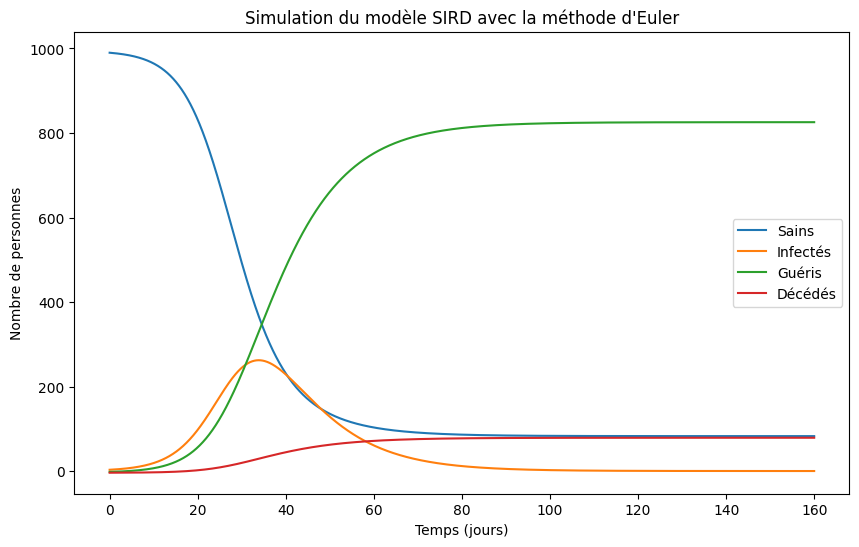

In [44]:
# importation des bibliothèques
import numpy as np
import matplotlib.pyplot as plt

# implementation de la methode d'euler
# discretiser le systeme d'equations differentielles

def euler_sird(S0, I0, R0, D0, N, beta, gamma, delta, dt, T):
    t = np.arange(0, T, dt)
    healthy_people = np.zeros(len(t))
    infected_people = np.zeros(len(t))
    people_healed = np.zeros(len(t))
    deceased_people = np.zeros(len(t))
    
    healthy_people[0] = S0
    infected_people[0] = I0
    people_healed[0] = R0
    deceased_people[0] = D0
    
    for _ in range(0, len(t) - 1):
        healthy_people[_ + 1] = healthy_people[_] + dS_dt(healthy_people[_], infected_people[_], N, beta) * dt
        infected_people[_ + 1] = infected_people[_] + dI_dt(healthy_people[_], infected_people[_], N, beta, gamma, delta) * dt
        people_healed[_ + 1] = people_healed[_] + dR_dt(infected_people[_], gamma) * dt
        deceased_people[_ + 1] = deceased_people[_] + dD_dt(infected_people[_], delta) * dt
    
    return t, healthy_people, infected_people, people_healed, deceased_people

# Paramètres du modèle
N = 1000
beta = 0.3
gamma = 0.1
delta = 0.01

# Conditions initiales
S0 = 0.99 * N
I0 = 0.003 * N
R0 = -0.002 * N
D0 = -0.004 * N

# Simulation
dt = 0.01
T = 160
t, healthy_people, infected_people, people_healed, deceased_people = euler_sird(S0, I0, R0, D0, N, beta, gamma, delta, dt, T)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(t, healthy_people, label='Sains')
plt.plot(t, infected_people, label='Infectés')
plt.plot(t, people_healed, label='Guéris')
plt.plot(t, deceased_people, label='Décédés')
plt.xlabel('Temps (jours)')
plt.ylabel('Nombre de personnes')
plt.legend()
plt.title('Simulation du modèle SIRD avec la méthode d\'Euler')
plt.show()

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

Text(0.5, 1.0, 'Simulation du modèle SIRD')

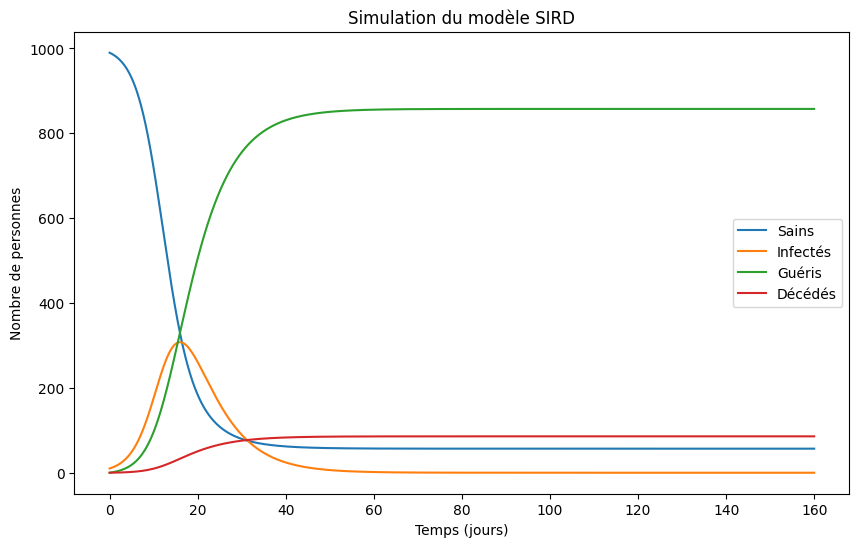

In [48]:
# Paramètres du modèle
N = 1000
beta = 0.5
gamma = 0.15
delta = 0.015

# Conditions initiales 
S0 = 0.99 * N
I0 = 0.01 * N
R0 = -0 * N
D0 = -0 * N

# Simulation
dt = 0.01
T = 160
t, healthy_people, infected_people, people_healed, deceased_people = euler_sird(S0, I0, R0, D0, N, beta, gamma, delta, dt, T)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(t, healthy_people, label='Sains')
plt.plot(t, infected_people, label='Infectés')
plt.plot(t, people_healed, label='Guéris')
plt.plot(t, deceased_people, label='Décédés')
plt.xlabel('Temps (jours)')
plt.ylabel('Nombre de personnes')
plt.legend()
plt.title('Simulation du modèle SIRD')

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [17]:
# importation des données
import pandas as pd

data = pd.read_csv('sird_dataset.csv')
data.head(5)


,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,-0.002455,-0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,-0.001515
3,3,0.988132,0.008969,-0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894


Meilleurs paramètres: beta=0.5, gamma=0.08, delta=0.005
Perte associée: 87721212.93689403


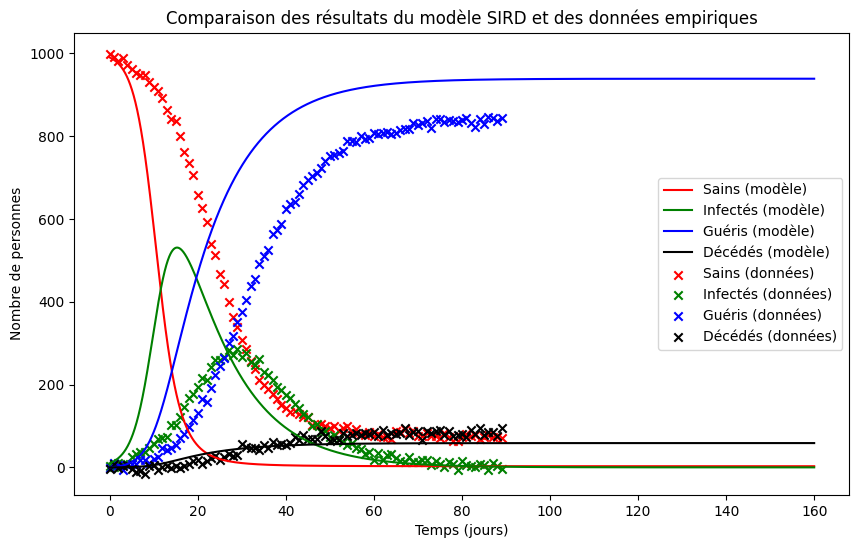

In [ ]:
# implementation d'une fonction de cout pour comparer les données simulées et les données réelles.
from numpy import less

# Mean squared error function
def mse(data, healthy_people, infected_people, people_healed, deceased_people):
    loss = 0
    for _, row in data.iterrows():
        loss += (row['Susceptibles'] - healthy_people[_])**2
        loss += (row['Infectés'] - infected_people[_])**2
        loss += (row['Rétablis'] - people_healed[_])**2
        loss += (row['Décès'] - deceased_people[_])**2
    return loss / len(data)

# Paramètres du modèle
N = 1000
beta_values = [0.25, 0.5] 
gamma_values = [0.08, 0.15] 
delta_values = [0.005, 0.015]

# Conditions initiales
S0 = 0.99 * N
I0 = 0.01 * N
R0 = 0 * N
D0 = 0 * N

# Simulation
dt = 0.01
T = 160

best_loss = float('inf')
best_params = None


# Grid Search pour trouver les valeurs optimales de beta, gamma et delta
for gamma in gamma_values:
        for delta in delta_values:
            t, healthy_people, infected_people, people_healed, deceased_people = euler_sird(S0, I0, R0, D0, N, beta, gamma, delta, dt, T)
            current_loss = loss(data, healthy_people, infected_people, people_healed, deceased_people)
            if current_loss < best_loss:
                best_loss = current_loss
                best_params = (beta, gamma, delta)              

# Affichage des meilleurs paramètres et de la perte associée
print(f"Meilleurs paramètres: beta={best_params[0]}, gamma={best_params[1]}, delta={best_params[2]}")
print(f"Perte associée: {best_loss}")

# Visualisation des résultats avec les meilleurs paramètres et les données empiriques
t, healthy_people, infected_people, people_healed, deceased_people = euler_sird(S0, I0, R0, D0, N, best_params[0], best_params[1], best_params[2], dt, T)

plt.figure(figsize=(10, 6))
plt.plot(t, healthy_people, 'r', label='Sains (modèle)')
plt.plot(t, infected_people, 'g', label='Infectés (modèle)')
plt.plot(t, people_healed, 'b', label='Guéris (modèle)')
plt.plot(t, deceased_people, 'k', label='Décédés (modèle)')
plt.scatter(data['Jour'], data['Susceptibles'] * N, color='r', marker='x', label='Sains (données)')
plt.scatter(data['Jour'], data['Infectés'] * N, color='g', marker='x', label='Infectés (données)')
plt.scatter(data['Jour'], data['Rétablis'] * N, color='b', marker='x', label='Guéris (données)')
plt.scatter(data['Jour'], data['Décès'] * N, color='k', marker='x', label='Décédés (données)')
plt.xlabel('Temps (jours)')
plt.ylabel('Nombre de personnes')
plt.legend()
plt.title('Comparaison des résultats du modèle SIRD et des données empiriques')
plt.show()






Nombre de reproduction de base (R0) : 3.0303030303030307
Quand R0 > 1, chaque personne infectée transmet la maladie à plus d'une autre personne en moyenne. L'épidémie tend à se propager.


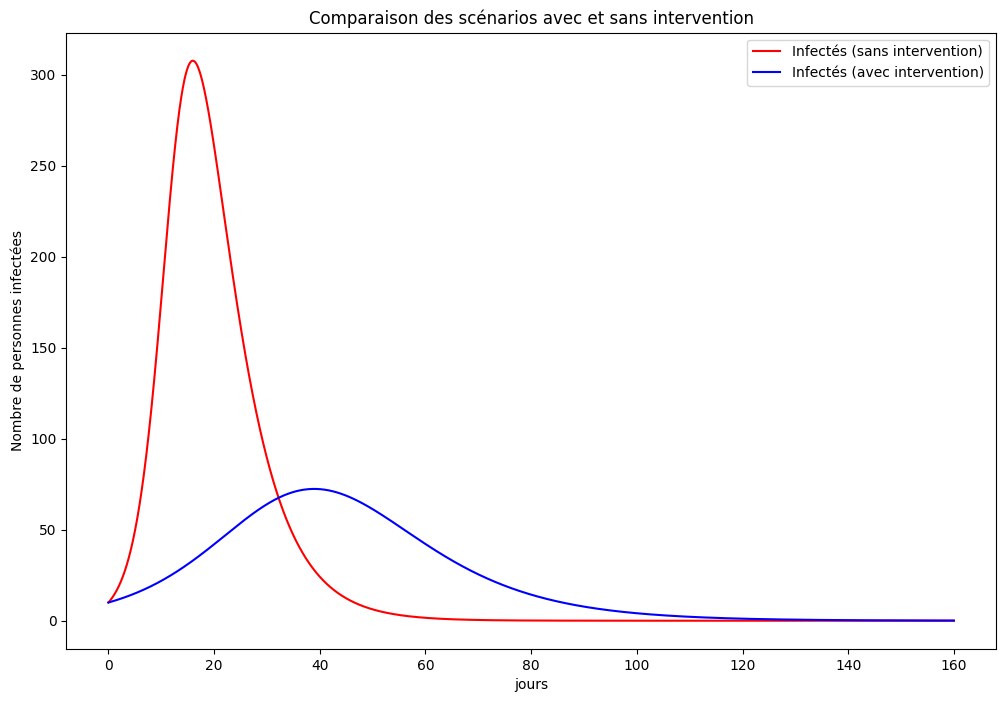

In [49]:
# Calcul du nombre de reproduction de base R0
R0 = beta / (gamma + delta)
print(f"Nombre de reproduction de base (R0) : {R0}")

# 1. Explication intuitive
if R0 < 1:
    print("Quand R0 < 1, chaque personne infectée transmet la maladie à moins d'une autre personne en moyenne. L'épidémie tend à s'éteindre.")
else:
    print("Quand R0 > 1, chaque personne infectée transmet la maladie à plus d'une autre personne en moyenne. L'épidémie tend à se propager.")

# 2. Intervention
beta_intervention = beta * 0.5 

# Simulation avec intervention
t_intervention, healthy_people_intervention, infected_people_intervention, people_healed_intervention, deceased_people_intervention = euler_sird(S0, I0, R0, D0, N, beta_intervention, gamma, delta, dt, T)

# 3. Comparaison des scénarios avec et sans intervention
plt.figure(figsize=(12, 8))
plt.plot(t, infected_people, label='Infectés (sans intervention)', color='red')
plt.plot(t_intervention, infected_people_intervention, label='Infectés (avec intervention)', color='blue')
plt.xlabel('jours')
plt.ylabel('Nombre de personnes infectées')
plt.legend()
plt.title('Comparaison des scénarios avec et sans intervention')
plt.show()

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.